# Assignment 6 - Programming part

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

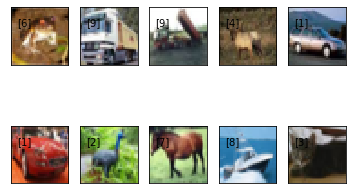

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [4]:
# 建立训练集和测试集（取一部分进行训练测试）
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [5]:
# 整理数据
# 数据归一化
x_train = tf.cast(x_train/255, tf.float32)
x_test = tf.cast(x_test/255, tf.float32)
# 将类别标签转为onehot编码
y_train = tf.keras.utils.to_categorical(y_train,10) 
y_test = tf.keras.utils.to_categorical(y_test,10)

In [6]:
x_train[:10]

<tf.Tensor: id=7, shape=(10, 32, 32, 3), dtype=float32, numpy=
array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.66666

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
# 用 Sequential 建立模型 
cifar_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(32,32,3)), # 卷积层
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25), # 让某个神经元的激活值以一定的概率（0.25）停止工作
    tf.keras.layers.Flatten(), # 把多维的输入一维化，常用在从卷积层到全连接层的过渡
    tf.keras.layers.Dense(128,activation="relu"), # 全连接层
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [9]:
# 输出模型各层的参数状况
cifar_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
# 训练模型
cifar_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])

In [11]:
cifar_model.fit(x_train,y_train,batch_size=128,epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 32s 3ms/sample - loss: 2.3025 - accuracy: 0.1078
Epoch 2/3
10000/10000 [==============================] - 32s 3ms/sample - loss: 2.2977 - accuracy: 0.1119
Epoch 3/3
10000/10000 [==============================] - 32s 3ms/sample - loss: 2.2925 - accuracy: 0.1190


In [12]:
# 测试数据
cifar_model.evaluate(x_test,y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.285078050613403, 0.114]

In [13]:
cifar_model.predict(x_test)

array([[0.10818989, 0.10181521, 0.09329235, ..., 0.09836128, 0.108964  ,
        0.1008237 ],
       [0.10946982, 0.10089176, 0.09231272, ..., 0.09597856, 0.11888638,
        0.11455964],
       [0.11078414, 0.10026211, 0.09263113, ..., 0.09678116, 0.11969682,
        0.10942578],
       ...,
       [0.11292636, 0.09952627, 0.09306568, ..., 0.09754747, 0.11068781,
        0.10629241],
       [0.11051331, 0.0985389 , 0.09988441, ..., 0.09593818, 0.10182764,
        0.10342103],
       [0.11410559, 0.09664246, 0.08923868, ..., 0.0978224 , 0.1187136 ,
        0.10902028]], dtype=float32)

### 4. Optional （暂时未做）

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [24]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.